TypeError: Image data of dtype object cannot be converted to float

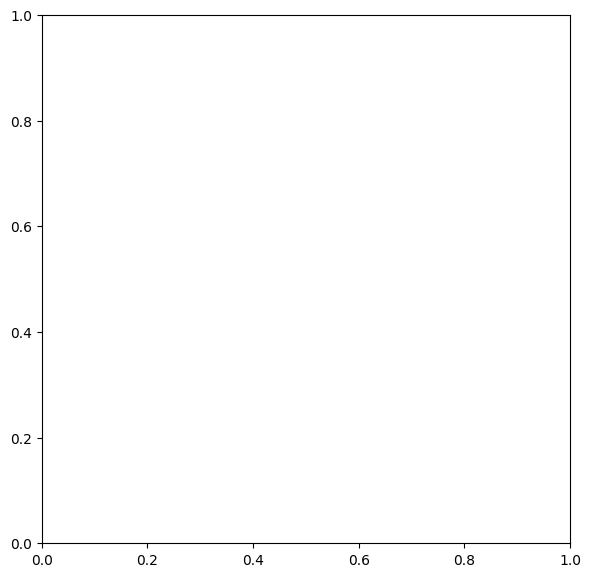

In [2]:
# Import necessary libraries
from IPython import get_ipython
from IPython.display import display

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

# Define paths to sample images
upic = 'D:/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic = 'D:/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'

# Display sample images
plt.figure(1, figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]), plt.yticks([])

plt.show()

# Define image dimensions
width = 128
height = 128

# Create an ImageDataGenerator for data augmentation and splitting
datagen = ImageDataGenerator(rescale=1 / 255.0, validation_split=0.2)  # Rescale pixel values and split data

# Create train and validation data generators
trainDatagen = datagen.flow_from_directory(
    directory='D:/cell_images/cell_images/',  # Path to the dataset directory
    target_size=(width, height),  # Resize images to the specified dimensions
    class_mode='binary',  # Set class mode to binary for classification
    batch_size=16,  # Set batch size for training
    subset='training'  # Use the training subset of the data
)

valDatagen = datagen.flow_from_directory(
    directory='D:/cell_images/cell_images/',  # Path to the dataset directory
    target_size=(width, height),  # Resize images to the specified dimensions
    class_mode='binary',  # Set class mode to binary for classification
    batch_size=16,  # Set batch size for validation
    subset='validation'  # Use the validation subset of the data
)

# Define the CNN model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Convolutional layer with 16 filters
model.add(MaxPool2D(2, 2))  # Max pooling layer
model.add(Dropout(0.2))  # Dropout layer for regularization

model.add(Conv2D(32, (3, 3), activation='relu'))  # Convolutional layer with 32 filters
model.add(MaxPool2D(2, 2))  # Max pooling layer
model.add(Dropout(0.3))  # Dropout layer for regularization

model.add(Conv2D(64, (3, 3), activation='relu'))  # Convolutional layer with 64 filters
model.add(MaxPool2D(2, 2))  # Max pooling layer
model.add(Dropout(0.3))  # Dropout layer for regularization

model.add(Flatten())  # Flatten the output for the dense layers
model.add(Dense(64, activation='relu'))  # Dense layer with 64 units
model.add(Dropout(0.5))  # Dropout layer for regularization

model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2)  # Stop training if validation loss doesn't improve for 2 epochs

# Train the model
history = model.fit_generator(
    generator=trainDatagen,  # Training data generator
    steps_per_epoch=len(trainDatagen),  # Number of steps per epoch
    epochs=20,  # Number of training epochs
    validation_data=valDatagen,  # Validation data generator
    validation_steps=len(valDatagen),  # Number of validation steps
    callbacks=[early_stop]  # Early stopping callback
)

# Define a function to plot the learning curves
def plotLearningCurve(history, epochs):
    epochRange = range(1, epochs + 1)
    plt.plot(epochRange, history.history['accuracy'])
    plt.plot(epochRange, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    plt.show()

    plt.plot(epochRange, history.history['loss'])
    plt.plot(epochRange, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.show()

# Plot the learning curves for 3 epochs
plotLearningCurve(history, 3)

# Test a random image
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(
    'C:/Users/Priya/Desktop/abc.png',  # Path to the test image
    target_size=(128, 128)  # Resize the image
)

test_image = image.img_to_array(test_image)  # Convert image to array
test_image = np.expand_dims(test_image, axis=0)  # Add an extra dimension

result = model.predict(test_image)  # Make a prediction

# Determine the prediction based on the result
if result[0][0] >= 0.5:
    prediction = "Uninfected"
else:
    prediction = "Parasitized"
print(prediction)  # Print the prediction

# Print class indices and lengths of train and validation data generators
print(trainDatagen.class_indices)
print(len(trainDatagen))
print(1378 * 16)
print(len(valDatagen))
